# Домашнее задание к лекции "Задачи классификации и кластеризации"

## Задание
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, silhouette_score
#from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

#from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

### 1. Получение данных

In [2]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2. Формируем рабочий датфрейм

In [5]:
df = df_iris[['sepal length (cm)', 'sepal width (cm)']]

In [6]:
df.columns = ['sepal_length', 'sepal_width']

In [7]:
df.insert(0, 'variety', variety)

In [8]:
df.head()

,variety,sepal_length,sepal_width
0,0,5.1,3.5
1,0,4.9,3.0
2,0,4.7,3.2
3,0,4.6,3.1
4,0,5.0,3.6


### 3. Делим данные на ваборки для обучения и тестирования

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal_length', 'sepal_width']],
    df.variety,
    random_state=42
)

In [10]:
print(f'Размер обучающей выборки: {len(X_train)} записей')
print(f'Размер выборки для тестирования: {len(X_test)} записей')

Размер обучающей выборки: 112 записей
Размер выборки для тестирования: 38 записей


### 4. Построение модели линейного дискриминантного анализа

In [11]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
prediction = lda.predict(X_test)

### 5. Визуализация предсказания для тестовой выборки и центра классов

In [13]:
# рассчитаем метрику качества accuracy
round(accuracy_score(y_test, prediction), 2)

0.87

In [14]:
# рассчитаем координаты центров классов
lda.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

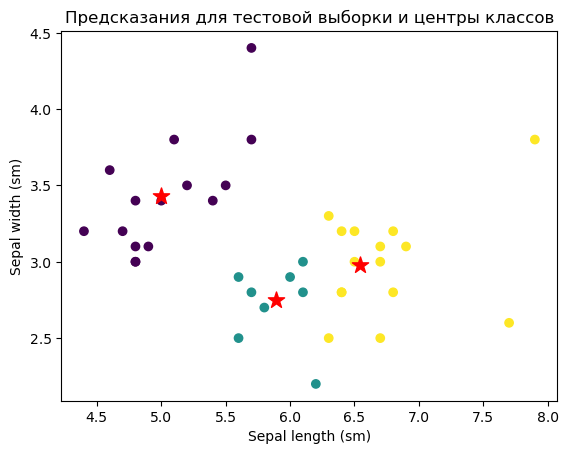

In [15]:
# построим диаграмму рассеяния
plt.scatter(
    x=X_test['sepal_length'],
    y=X_test['sepal_width'],
    c=prediction
)
plt.scatter(
    lda.means_[:,0],
    lda.means_[:,1],
    c='r',
    s=150,
    marker='*'
)
plt.title('Предсказания для тестовой выборки и центры классов')
plt.xlabel('Sepal length (sm)')
plt.ylabel('Sepal width (sm)')
plt.show();

### 6. Подготовка данных к проведению кластеризации

In [16]:
df = df[['sepal_length', 'sepal_width']]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [17]:
df.describe()

,sepal_length,sepal_width
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


### 7. Определяем оптимальное число кластеров для алгоритма k-means
- Сделаем вид, что не знаем количества видов ирисов в оригинальном датафрейме.
- Учитывая, что значения данных имеют одну размерность (см), проводить масштабирование на будем.

#### Строим график локтя

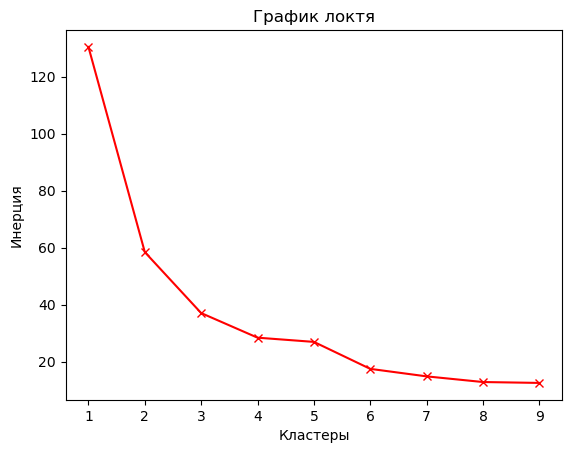

In [18]:
def get_inertia(cluster_num, df):
    k_means = KMeans(n_clusters=cluster_num,
                     n_init='auto',
                     random_state=42)
    k_means.fit(df)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, df))

plt.title('График локтя')
plt.xlabel('Кластеры')
plt.ylabel('Инерция')
plt.plot([i for i in range(1, 10)], inertia, 'xr-')
plt.show();

**Вывод:** На графике мы не видим четного излома линии, по которому можно было бы однозначно определиться с числом кластеров (два, три, а может шесть?).

#### График силуэта

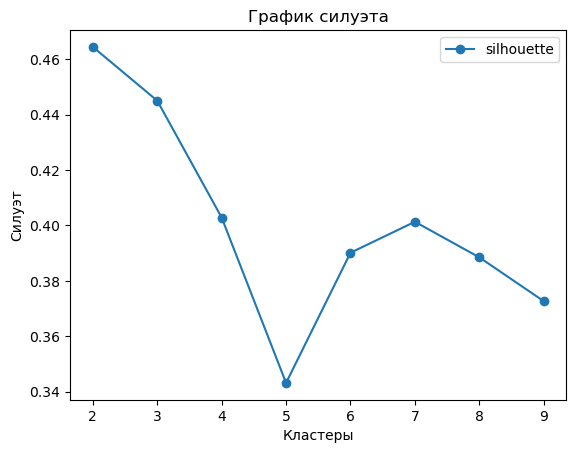

In [19]:
def get_silhouette(cluster_num, df):
    k_means = KMeans(n_clusters=cluster_num,
                     n_init='auto',
                     random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.predict(df))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, df))
    silhouette_res["cluster"].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)

silhouette_df.plot(
    'cluster',
   'silhouette',
    marker='o'
)
plt.title('График силуэта')
plt.xlabel('Кластеры')
plt.ylabel('Силуэт')
plt.show();

**Вывод:** Наиболее высокий пик графика на уровне двух кластеров

#### Проведем кластерный анализ по методу k-means
Количество кластеров = 2

In [20]:
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)
predictions = kmeans.fit_predict(df)


In [21]:
df_k = df.copy()

In [22]:
df_k.insert(0, 'Clusters_K', predictions)

In [23]:
df_k.head()

,Clusters_K,sepal_length,sepal_width
0,0,5.1,3.5
1,0,4.9,3.0
2,0,4.7,3.2
3,0,4.6,3.1
4,0,5.0,3.6


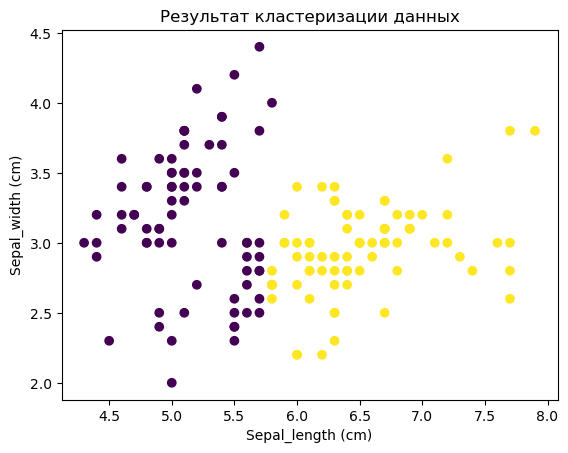

In [24]:
# Визуализируем результат
plt.scatter(
    x=df_k['sepal_length'],
    y=df_k['sepal_width'],
    c=df_k['Clusters_K'],
)
plt.title('Результат кластеризации данных')
plt.xlabel('Sepal_length (cm)')
plt.ylabel('Sepal_width (cm)')
plt.show();

**Вывод:** Визуально на диаграмме угадываются два вероятных "вытянутых" кластера. Которые метод k-means не смог распознать.

#### Проведем кластерный анализ по методу k-means
Количество кластеров = 3

In [25]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
predictions = kmeans.fit_predict(df)

In [26]:
df_k3 = df.copy()
df_k3.insert(0, 'Clusters_K3', predictions)
df_k3.head()

,Clusters_K3,sepal_length,sepal_width
0,2,5.1,3.5
1,2,4.9,3.0
2,2,4.7,3.2
3,2,4.6,3.1
4,2,5.0,3.6


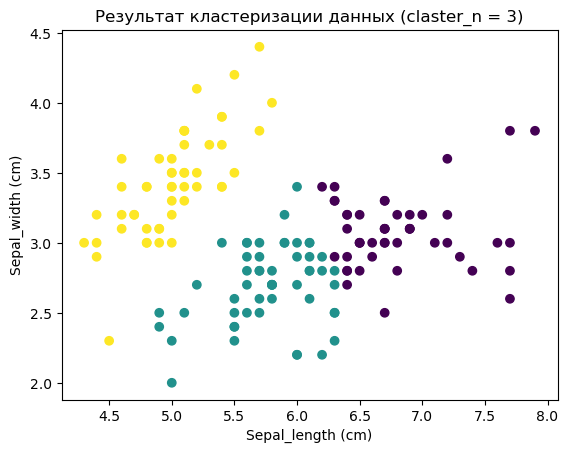

In [27]:
# Визуализируем результат
plt.scatter(
    x=df_k3['sepal_length'],
    y=df_k3['sepal_width'],
    c=df_k3['Clusters_K3'],
)
plt.title('Результат кластеризации данных (claster_n = 3)')
plt.xlabel('Sepal_length (cm)')
plt.ylabel('Sepal_width (cm)')
plt.show();

**Сравним с реальными данными**

In [28]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


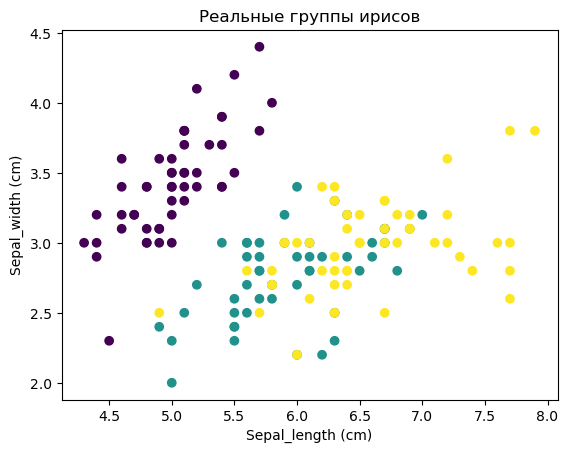

In [29]:
# Визуализируем результат
plt.scatter(
    x=df_iris['sepal length (cm)'],
    y=df_iris['sepal width (cm)'],
    c=variety,
)
plt.title('Реальные группы ирисов')
plt.xlabel('Sepal_length (cm)')
plt.ylabel('Sepal_width (cm)')
plt.show();

**Вывод:** Расположение точек на диаграмме с реальными данными объясняет неудовлетворительные результаты кластеризации методов k-means:
- один из трех кластеров был дифференцирован удовлетворительно,
- два других менее точно.

#### Проведем кластерный анализ с использованием иерархического алгоритма, построим дендрограмму и сравним результаты двух методов кластерного анализа

In [30]:
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [31]:
clusteting = AgglomerativeClustering()
predictions = clusteting.fit_predict(df)

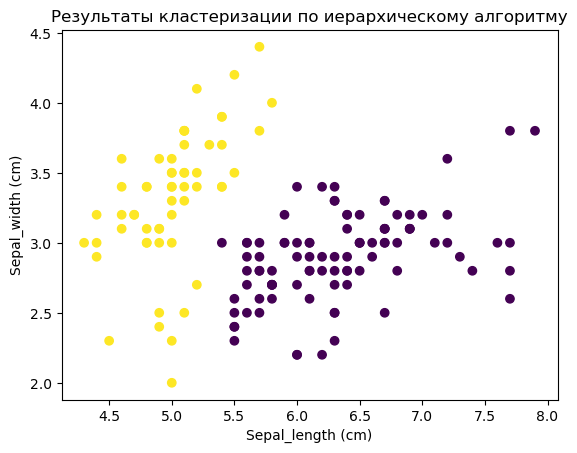

In [32]:
# визуализируем результат
plt.scatter(
    x=df['sepal_length'],
    y=df['sepal_width'],
    c=predictions,
)
plt.title('Результаты кластеризации по иерархическому алгоритму')
plt.xlabel('Sepal_length (cm)')
plt.ylabel('Sepal_width (cm)')
plt.show();

**Вывод:** Видно, что алгоритм выделил тоже два кластера, но лучше, чем алгоритм k-means.

#### Дендрограмма

In [33]:
linked = linkage(df, 'ward')

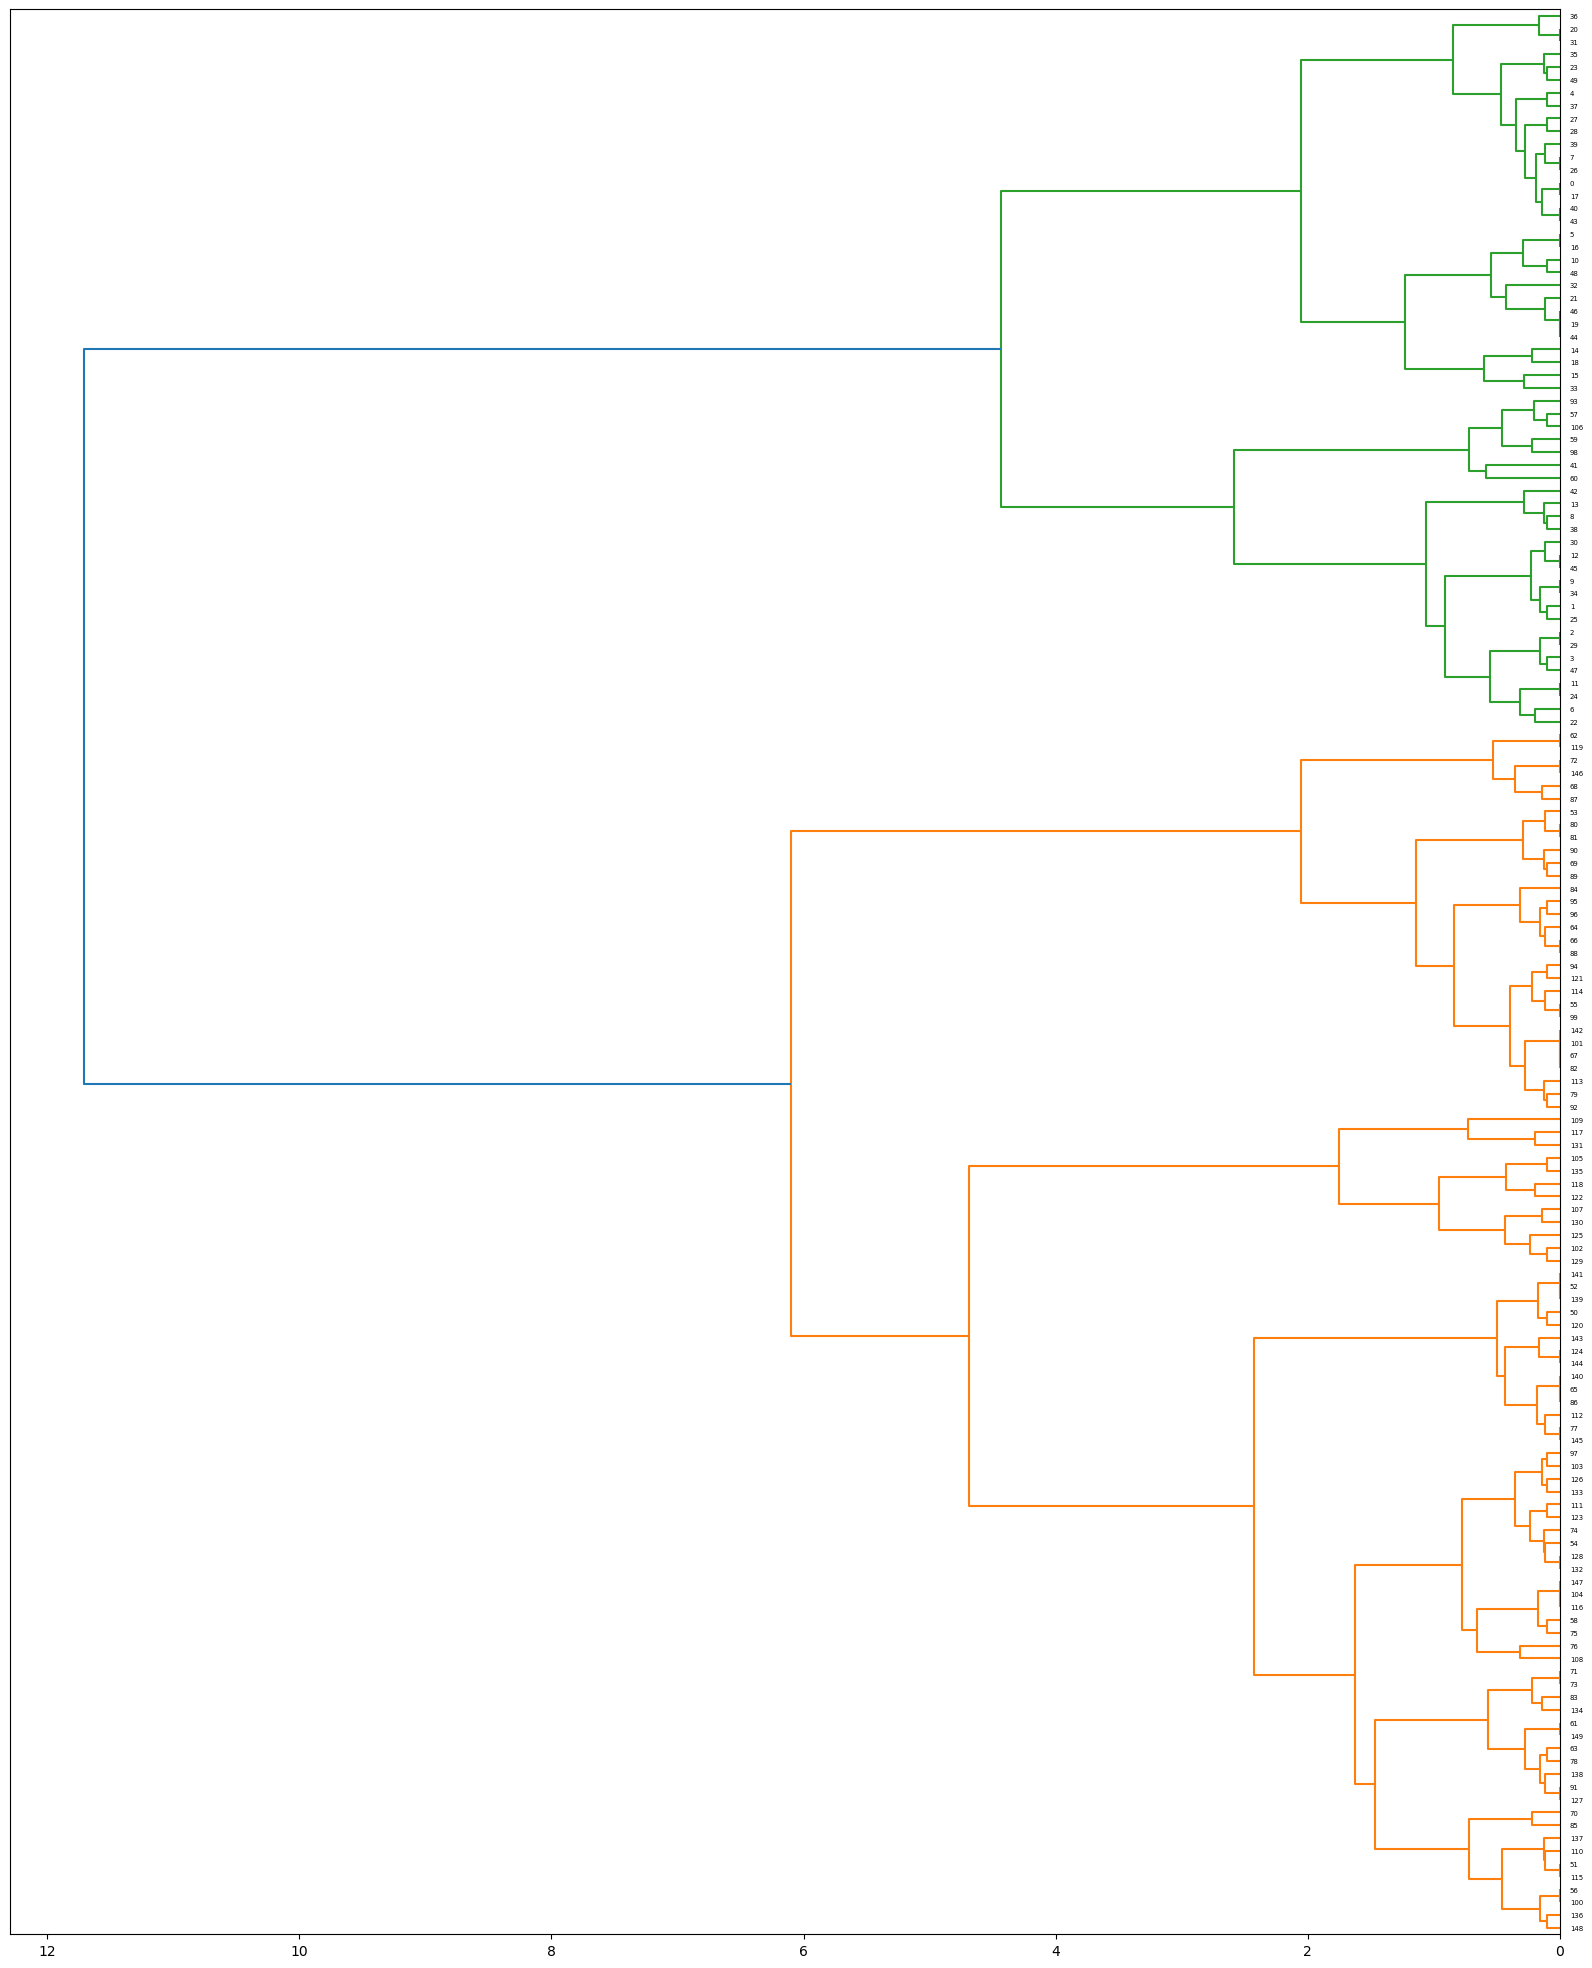

In [34]:
plt.figure(figsize=(20, 25))
dendrogram(Z=linked,
           orientation='left',
           labels=df.index,
           distance_sort='descending'
          )
plt.show()

**Вывод:** Автоматически алгоритм выделил два кластера. Но если присмотреться внимательно, можно выделить 5 или 6 кластеров. Ботаникам стоит задуматься над вопросом количества видов ириса.

С другой стороны возможна проблема нехватки данных, и по двум признакам проводить кластеризацию довольно непросто. 